### we have two ways of analysing linear relationship between two variables : Covariance and Correlation

### Covariance : read about its significance from statslectures playist

##### covariance is statistical measure that describes the degree to which two numeric variables are linearly related . It measures how much two variables change together,such that when one variable increase does the other variable even increase , we use scatterplot to visualize this
#### do not sort numeric variables for this calculation,but you can scale them before or transform them before
#### this notebook is just for demonstration purposes , so it has just integer values,but we can use float values , no need to check their uniqueness , we can have duplicate values as well

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats

### case 1 : highly positive covariance

In [2]:
var1=[10,2,27,7,45,6,69,79,79,85]

In [3]:
var2=[2,20,22,30,41,50,60,70,90,99]

<Axes: >

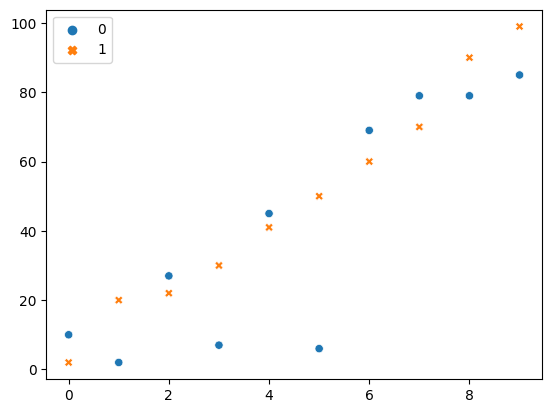

In [4]:
sns.scatterplot((var1,var2))

###### x axis is contains number of observation and there values are on y axis marked in graph with respective markers ( o for var1 value , x for var2 value)
##### above plot shows when var1 increases var2 also increases linearly , so they together have highly positive covariance 

In [5]:
np.cov(var1,var2)

array([[1186.98888889,  934.26666667],
       [ 934.26666667,  993.82222222]])

##### covariance is 934.266666667 for var1 and var2

In [6]:
np.cov(var2,var1)

array([[ 993.82222222,  934.26666667],
       [ 934.26666667, 1186.98888889]])

### case 2 : highly negative covariance

In [7]:
var1=[90,99,34,89,45,67,43,39,29,10]
var2=[2,20,22,30,41,50,60,70,90,99]

<Axes: >

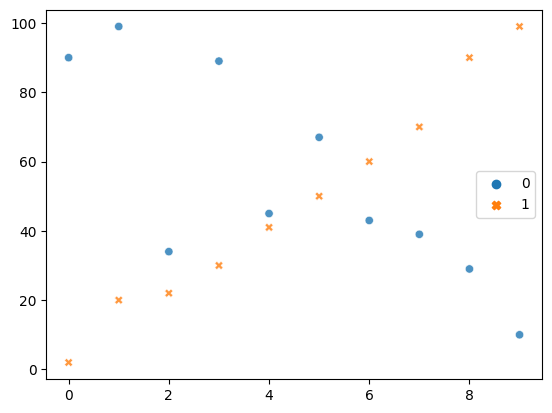

In [8]:
sns.scatterplot((var1,var2),alpha=0.8)

##### above graph shows when var1 value decreases when var2 value increases , which shows that have negative linearly dependent relationship , such that when one increases then other decreases , so they have highly negative covariance

In [9]:
np.cov(var1,var2)

array([[ 900.05555556, -743.88888889],
       [-743.88888889,  993.82222222]])

##### their covariance is -743.888888889

### case 3 : nearly null covariance

In [10]:
var1=[10,12,45,5,14,5,14,15,19,17,-1,-2,-9]
var2=[2,20,22,30,41,50,60,70,90,99,-5,-8,-16]

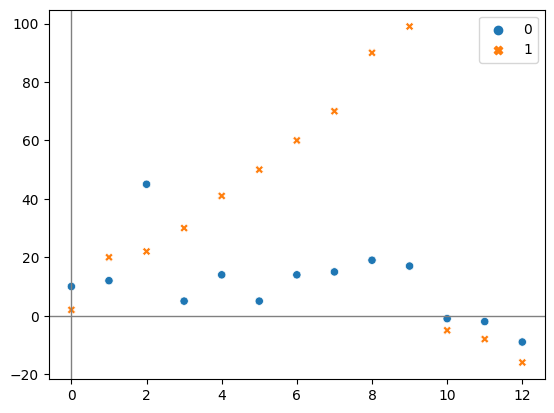

In [11]:
ax=sns.scatterplot((var1,var2))
ax.axhline(0,color='grey',lw=1)
ax.axvline(0,color='grey',lw=1)

In [12]:
np.cov(var1,var2)

array([[ 173.07692308,  219.33333333],
       [ 219.33333333, 1399.16666667]])

##### var1 remains very less affected by the increase of var2 values, so their covariance is very near to 0 , indicating var1 is linearly independent of var2 , in above case covariance is -4.822222222

#### covariance of numeric feature 1 to numeric feature 2 is calculated by using that covariance formula respectively by considering them as samples, and populations
##### inside numpy population covariance formula is used|

### Correlation coefficient : Read about its significance from statslectures playist
#### Pearson Correlation Coefficient

In [13]:
#we need numpy arrays only , cant use lists
var1=pd.Series(np.array(var1))
var2=pd.Series(np.array(var2))

In [14]:
var1.corr(var2)

0.4457078990669465

##### we can also calculate correlation between all numeric features using df.corr()     it gives correlation matrix containing pearson correlation coefficient (also known as R value) between all pairs of numeric features : they are better visualized by heatmaps

In [15]:
df=pd.read_csv("StudentsPerformance.csv")
df.corr()

C:\Users\Admin\AppData\Local\Temp\ipykernel_8828\2192634678.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


C:\Users\Admin\AppData\Local\Temp\ipykernel_8828\58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

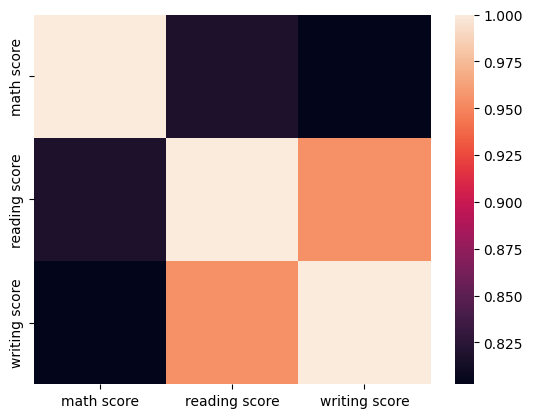

In [16]:
sns.heatmap(df.corr())

In [17]:
df.cov()

C:\Users\Admin\AppData\Local\Temp\ipykernel_8828\1545644723.py:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.cov()


,math score,reading score,writing score
math score,229.918998,180.998958,184.939133
reading score,180.998958,213.165605,211.786661
writing score,184.939133,211.786661,230.907992


C:\Users\Admin\AppData\Local\Temp\ipykernel_8828\1635920665.py:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.cov())


<Axes: >

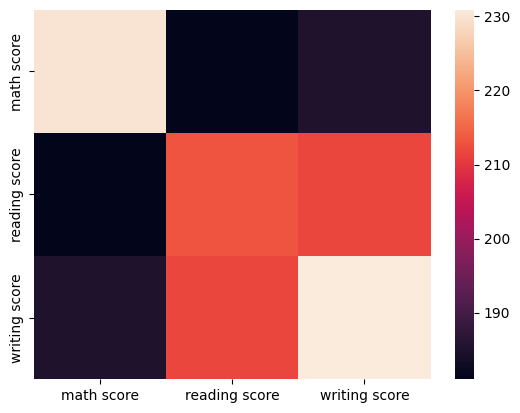

In [18]:
sns.heatmap(df.cov())

##### all scatter plots can be together plotted into scatter matrix

array([[<Axes: xlabel='math score', ylabel='math score'>,
        <Axes: xlabel='reading score', ylabel='math score'>,
        <Axes: xlabel='writing score', ylabel='math score'>],
       [<Axes: xlabel='math score', ylabel='reading score'>,
        <Axes: xlabel='reading score', ylabel='reading score'>,
        <Axes: xlabel='writing score', ylabel='reading score'>],
       [<Axes: xlabel='math score', ylabel='writing score'>,
        <Axes: xlabel='reading score', ylabel='writing score'>,
        <Axes: xlabel='writing score', ylabel='writing score'>]],
      dtype=object)

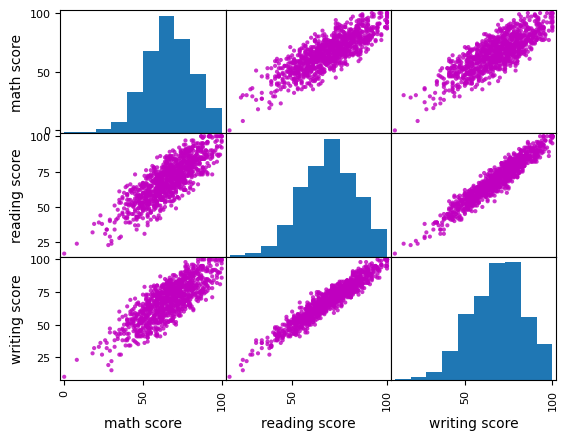

In [55]:
pd.plotting.scatter_matrix(df,color='m',alpha=0.8)

##### pairplot to see the distribution of variables by displot as well as see correlation between them using scatterplot

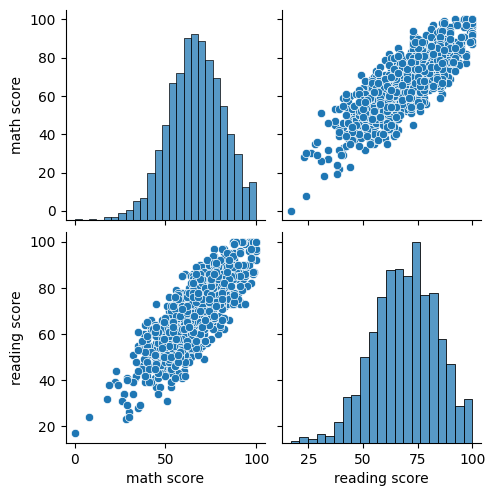

In [51]:
sns.pairplot(pd.DataFrame(pd.concat((df['math score'],df['reading score']),axis=1)))

##### little more visualisale version of scatterplot is hexbin plot

<Axes: xlabel='math score', ylabel='writing score'>

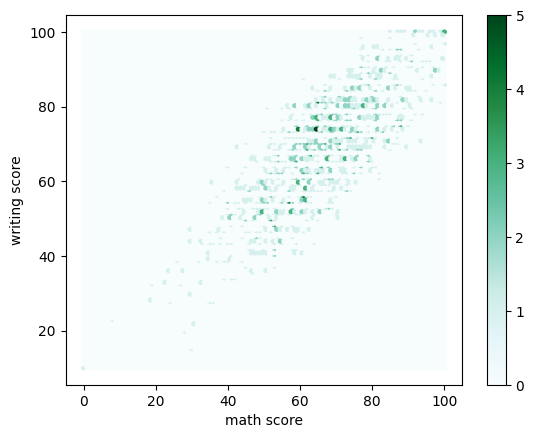

In [61]:
df.plot.hexbin(x='math score',y='writing score')